# Comparison of trkqual and t0

## Preamble

In [65]:
# External packages
import sys
import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import awkward as ak

# pyutils classes
from pyutils.pylogger import Logger
from pyutils.pyplot import Plot
from pyutils.pyselect import Select

# mu2e-cosmic classes
sys.path.extend(["../../../src/utils", "../../../src/core"])
from io_manager import Load
from analyse import Analyse # just for pitch angle

logger = Logger()

## Load data

Compare au and aw 

In [114]:
datasets = ["CRY MDC2020au", "CRY MDC2020aw", "CeEndpoint MDC2020au", "CeEndpoint MDC2020aw"]

In [115]:
!ls -ltrh ../../../output/results/

total 0
drwxr-sr-x. 3 sgrant 65534 10 Aug  8 10:08 alpha_CRY_offspill-LH_as_BK
drwxr-sr-x. 2 sgrant 65534  6 Aug 13 17:54 test_groups
drwxr-sr-x. 2 sgrant 65534 11 Aug 13 20:57 test
drwxr-sr-x. 2 sgrant 65534  7 Aug 13 22:13 alpha_test
drwxr-sr-x. 3 sgrant 65534 11 Aug 13 22:22 alpha_CRY_offspill-LH_as
drwxr-sr-x. 2 sgrant 65534  8 Aug 13 22:55 SU2020b_CRY_onspill-LH_au
drwxr-sr-x. 2 sgrant 65534  9 Aug 14 01:04 alpha_CRY_onspill-LH_aq
drwxr-sr-x. 3 sgrant 65534 10 Aug 14 01:07 alpha_CRY_onspill-LH_au
drwxr-sr-x. 2 sgrant 65534 10 Aug 14 01:10 alpha_CRY_onspill-LH_aw
drwxr-sr-x. 2 sgrant 65534  7 Aug 14 01:11 alpha_signal_onspill-LH_an
drwxr-sr-x. 2 sgrant 65534  7 Aug 14 01:14 alpha_signal_onspill-LH_aq
drwxr-sr-x. 2 sgrant 65534  7 Aug 14 01:18 alpha_signal_onspill-LH_au
drwxr-sr-x. 2 sgrant 65534  7 Aug 14 01:21 alpha_signal_onspill-LH_aw
drwxr-sr-x. 2 sgrant 65534  9 Aug 14 01:24 SU2020a_CRY_offspill-LH_as
drwxr-sr-x. 2 sgrant 65534  9 Aug 14 01:27 SU2020a_CRY_onspill-LH_aq
drwxr-s

In [116]:
ana_labels = {
    # datasets[0]: "preselection_CRY_onspill-LH_aq",
    datasets[0]: "preselection_CRY_onspill-LH_au",
    datasets[1]: "preselection_CRY_onspill-LH_aw",
    # datasets[3]: "preselection_signal_onspill-LH_aq",
    datasets[2]: "preselection_signal_onspill-LH_au",
    datasets[3]: "preselection_signal_onspill-LH_aw",
}

results = {}
for key, ana_label in ana_labels.items():
    loader = Load(
        in_path = f"../../../output/results/{ana_label}"
    )
    results[key] = loader.load_pkl()     

[Load] ✅ Initialised with out_path=../../../output/results/preselection_CRY_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../../output/results/preselection_CRY_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../../output/results/preselection_CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../../output/results/preselection_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../../output/results/preselection_signal_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../../output/results/preselection_signal_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../../output/results/preselection_signal_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../../output/results/preselection_signal_onspill-LH_aw/results.pkl


## Cutflow

In [117]:
for label, result in results.items(): 
    logger.log(label, "info")
    display(result["cut_flow"].round(3))

[pylogger] ⭐️ CRY MDC2020au


,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,267495,100.000,100.000,No selection applied
1,has_trk_front,Preselect,267265,99.914,99.914,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,256419,95.859,95.942,Electron track fits
3,is_downstream,Preselect,155733,58.219,60.734,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,111853,41.815,71.824,One reco electron / event
5,is_truth_electron,Preselect,33212,12.416,29.693,Track parents are electrons (truth PID)


[pylogger] ⭐️ CRY MDC2020aw


,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,308264,100.000,100.000,No selection applied
1,has_trk_front,Preselect,302256,98.051,98.051,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,292440,94.867,96.752,Electron track fits
3,is_downstream,Preselect,179262,58.152,61.299,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,133090,43.174,74.243,One reco electron / event
5,is_truth_electron,Preselect,38453,12.474,28.892,Track parents are electrons (truth PID)


[pylogger] ⭐️ CeEndpoint MDC2020au


,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,145542,100.000,100.000,No selection applied
1,has_trk_front,Preselect,145509,99.977,99.977,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,142980,98.240,98.262,Electron track fits
3,is_downstream,Preselect,142970,98.233,99.993,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,142591,97.972,99.735,One reco electron / event
5,is_truth_electron,Preselect,142591,97.972,100.000,Track parents are electrons (truth PID)


[pylogger] ⭐️ CeEndpoint MDC2020aw


,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,147706,100.000,100.000,No selection applied
1,has_trk_front,Preselect,147673,99.978,99.978,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,147534,99.884,99.906,Electron track fits
3,is_downstream,Preselect,147533,99.883,99.999,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,147114,99.599,99.716,One reco electron / event
5,is_truth_electron,Preselect,147113,99.599,99.999,Track parents are electrons (truth PID)


In [118]:


# from pyutils.pyprint import Print
# printer = Print()

# printer.print_n_events(results["CRY MDC2020au"]["events"])

## Select tracker front

In [119]:
# help(selector.select_surface)

In [120]:
# Filter tracker entrance
selector = Select()

# Applies to results[dataset]["events"]
def surface_cut(arr, surface_name="TT_Front"): 
    # for label, result in results.items():
    # Copy
    arr_cut = ak.copy(arr)
    # Track front 
    at_trk_front = selector.select_surface(arr_cut["trkfit"], surface_name=surface_name) # trksegs-level
    has_trk_front = ak.any(at_trk_front, axis=-1)
    # Cut
    # arr_cut["trk"] = arr_cut["trk"][at_trk_front]
    arr_cut["trkfit"] = arr_cut["trkfit"][at_trk_front]
    # Then clean up events with no tracks after cuts
    arr_cut = arr_cut[ak.any(has_trk_front, axis=-1)]
    # Return filtered array
    return arr_cut

results_BK = results.copy()
for label, result in results.items():
    results[label]["events"] = surface_cut(results[label]["events"])

[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyselect] ✅ Returning mask for trksegs with sid = 0


## Array flattener

In [121]:
# results["CRY MDC2020au"]["events"].keys()

In [122]:
analyse = Analyse() 

def get_flat_arrays(results):
    
    # Init arrays (a bit ugly but whatever)
    trkqual, nactive, t0err, d0, lhr_max, pitch_angle = {}, {}, {}, {}, {}, {}
    # Loop through results
    for label, result in results.items(): 
        # flatten 
        trkqual[label] = ak.flatten(result["events"]["trk"]["trkqual.result"], axis=None)
        nactive[label] = ak.flatten(result["events"]["trk"]["trk.nactive"], axis=None)
        t0err[label] = ak.flatten(result["events"]["trkfit"]["trksegpars_lh"]["t0err"], axis=None)
        d0[label] = ak.flatten(result["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None)
        lhr_max[label] = ak.flatten(result["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None)
        
        pitch_angle[label] = ak.flatten(analyse.get_pitch_angle(result["events"]["trkfit"]), axis=None)

    return trkqual, nactive, t0err, d0, lhr_max, pitch_angle

trkqual, nactive, t0err, d0, lhr_max, pitch_angle = get_flat_arrays(results)


[pyvector] ⭐️ Initialised Vector with verbosity = 1
[Analyse] ⭐️ Initialised with:
  on_spill        = False
  cut_config_path = /home/sgrant/mu2e-cosmic/src/core/../../config/common/cuts.yaml
  cutset_name     = alpha (baseline cutset with loop helix parameters)
  verbosity       = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector


## Plot trkqual and t0 

In [123]:
trkqual

{'CRY MDC2020au': <Array [0.779, 0.987, 0.0317, ..., 0.835, 0.94, 0.0386] type='33212 * float32'>,
 'CRY MDC2020aw': <Array [0.613, 0.92, 0.0712, ..., 0.264, 0.682, 0.842] type='38453 * float32'>,
 'CeEndpoint MDC2020au': <Array [0.988, 0.935, 0.941, ..., 0.966, 0.394, 0.13] type='142591 * float32'>,
 'CeEndpoint MDC2020aw': <Array [0.924, 0.982, 0.126, ..., 0.951, 0.961, 0.766] type='147113 * float32'>}

In [124]:
plotter = Plot()

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


[pylogger] ✅ 	Wrote ../../../output/images/comp/h1o_2x3_trk_params_au_aw_no_lines.png


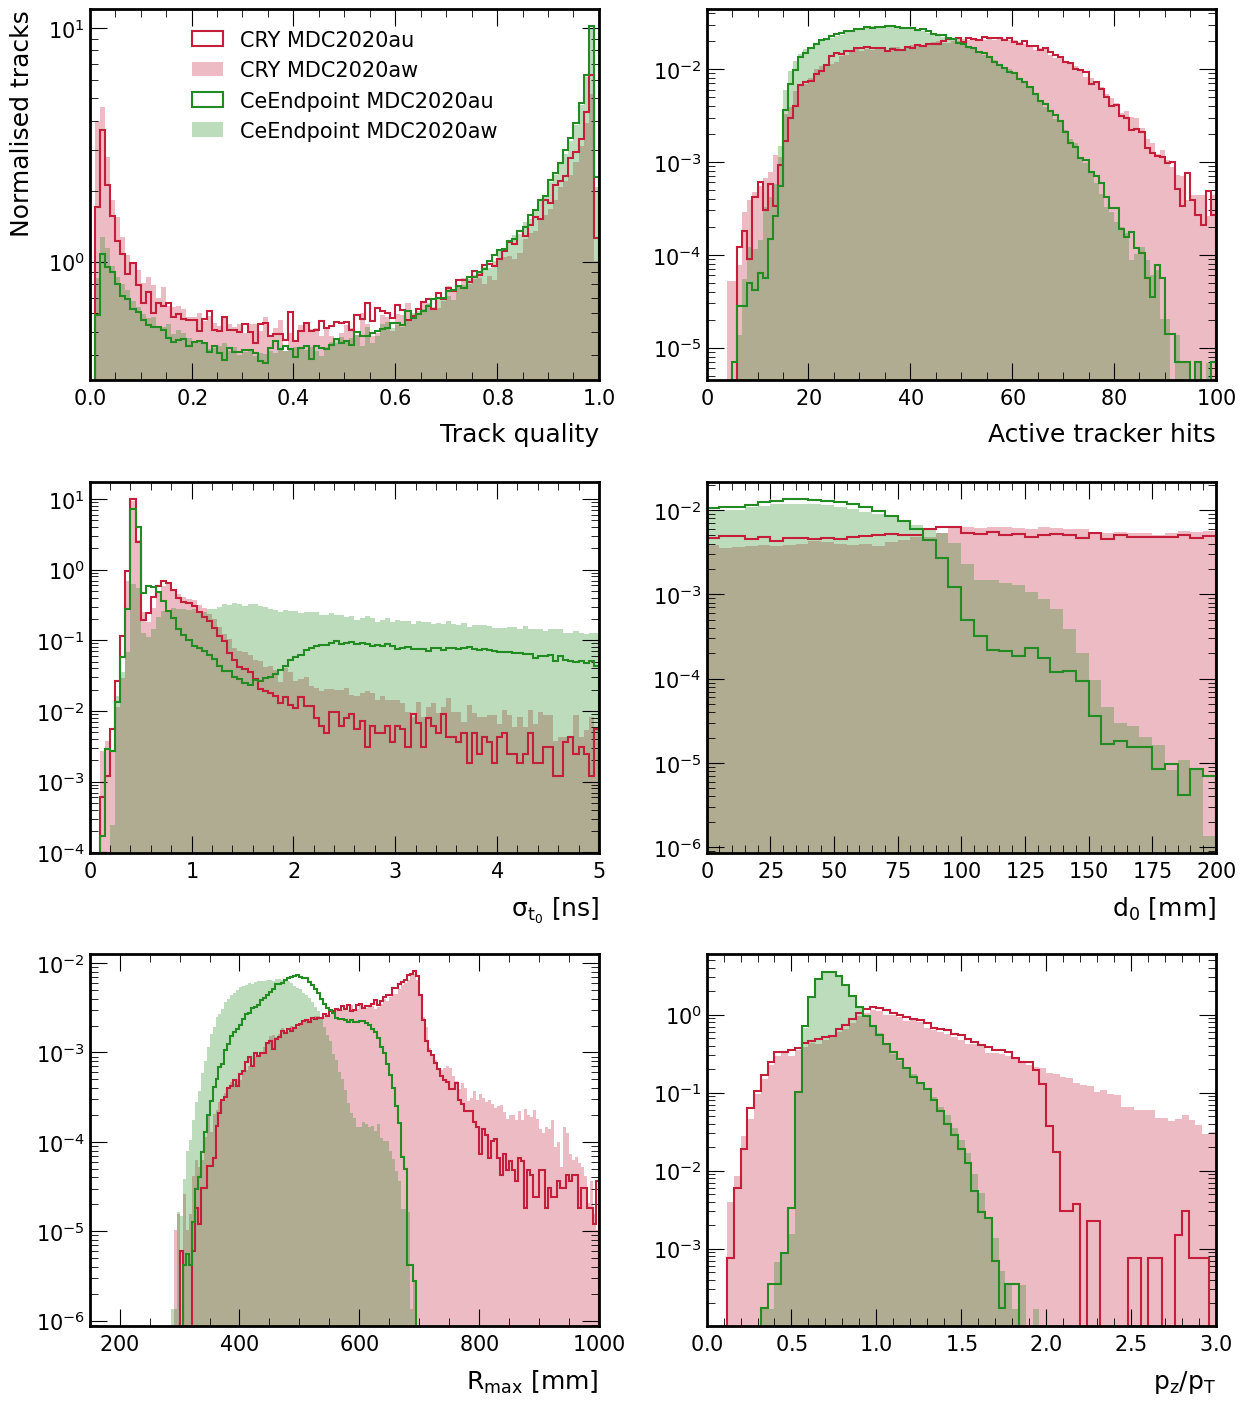

In [128]:
fig, ax = plt.subplots(3, 2, figsize=(2*6.4, 3*4.8))

styles = {
    datasets[0] : {"color": "#C41E3A"},
    # datasets[1] : {"color": "#C41E3A", "linestyle": "--"},
    datasets[1] : {"color": "#C41E3A", "histtype": "bar"},
    datasets[2] : {"color": "#228B22"},
    datasets[3] : {"color": "#228B22", "histtype": "bar"},
    # datasets[5] : {"color": "#228B22", "linestyle": "--"}
}

plotter.plot_1D_overlay(
    trkqual,
    nbins=100,
    xmin=0,
    xmax=1,
    xlabel="Track quality",
    ylabel="Normalised tracks",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=True,
    show=False,
    ax=ax[0,0],
    log_y=True
)

plotter.plot_1D_overlay(
    nactive,
    nbins=100,
    xmin=0,
    xmax=100,
    xlabel="Active tracker hits",
    # ylabel="Normalised tracks",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[0,1],
    log_y=True
)

plotter.plot_1D_overlay(
    t0err,
    nbins=100,
    xmin=0,
    xmax=5,
    xlabel=r"$\sigma_{t_{0}}$ [ns]",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[1,0],
    log_y=True
)


plotter.plot_1D_overlay(
    d0,
    nbins=40,
    xmin=0,
    xmax=200,
    xlabel=r"$d_{0}$ [mm]",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[1,1],
    log_y=True
)

plotter.plot_1D_overlay(
    lhr_max,
    nbins=170,
    xmin=150,
    xmax=1000,
    xlabel=r"$R_{\text{max}}$ [mm]",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[2,0],
    log_y=True
)

plotter.plot_1D_overlay(
    pitch_angle,
    nbins=75,
    xmin=0,
    xmax=3.0,
    xlabel=r"$p_{z}/p_{T}$", 
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[2,1],
    log_y=True
)


plt.tight_layout()
out_path = "../../../output/images/comp/h1o_2x3_trk_params_au_aw_no_lines.png"
plt.savefig(out_path, dpi=300)
logger.log(f"\tWrote {out_path}", "success")
plt.show()

## Correlations 

In [126]:
# # Filter tracker entrance
# selector = Select()

# def apply_trk_ent_cut(data): 
#     # Copy
#     this_data = ak.copy(data)
#     # Track front 
#     at_trk_front = selector.select_surface(this_data["trkfit"], surface_name="TT_Front") # trksegs-level
#     has_trk_front = ak.any(at_trk_front, axis=-1)
#     # Cut
#     this_data["trkfit"] = this_data["trkfit"][at_trk_front]
#     # Then clean up events with no tracks after cuts
#     return this_data[ak.any(has_trk_front, axis=-1)]

# for array in trkqual

# onspill["events"] = apply_trk_ent_cut(onspill["events"])
# signal["events"] = apply_trk_ent_cut(signal["events"])



# print(len(trkqual[datasets[0]]), len(t0err[datasets[0]]))

In [80]:
# styles